In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [4]:
file_url = R"C:\Users\neetu\married_at_first_sight.csv"
df = pd.read_csv(file_url)

In [5]:
df.head(5)

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0


In [6]:
nRow, nCol = df.shape
print(f'there are {nRow} rows ans {nCol} columns')

there are 68 rows ans 17 columns


In [7]:
df.describe()    
                              



,Couple,Season,Age,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
count,68.000000,68.000000,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,17.500000,5.941176,29.970588,1.0,0.264706,0.264706,0.264706,0.735294,0.176471,0.294118,0.264706
std,9.883652,2.991941,3.195008,0.0,0.444457,0.444457,0.444457,0.444457,0.384054,0.459033,0.444457
min,1.000000,1.000000,24.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,27.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.500000,6.000000,30.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,26.000000,9.000000,32.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,34.000000,10.000000,37.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 17 columns):
Couple                  68 non-null int64
Season                  68 non-null int64
Location                68 non-null object
Name                    68 non-null object
Age                     68 non-null int64
Gender                  68 non-null object
Occupation              68 non-null object
Decision                68 non-null object
Status                  68 non-null object
DrPepperSchwartz        68 non-null int64
DrLoganLevkoff          68 non-null int64
DrJosephCilona          68 non-null int64
ChaplainGregEpstein     68 non-null int64
PastorCalvinRoberson    68 non-null int64
RachelDeAlto            68 non-null int64
DrJessicaGriffin        68 non-null int64
DrVivianaColes          68 non-null int64
dtypes: int64(11), object(6)
memory usage: 9.1+ KB


In [9]:
print(df.shape)
print(df.ndim)
print(df.size)
     

(68, 17)
2
1156


In [10]:
def uniquevalue(data):
    for i in data:
        print(i, "=", data[i].unique(), end = "\n\n")
uniquevalue(df)

Couple = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]

Season = [ 1  2  3  4  5  6  7  8  9 10]

Location = ['New York City and Northern New Jersey' 'Atlanta, Georgia'
 'South Florida' 'Chicago, Illinois' 'Boston, Massachusetts'
 'Dallas, Texas' 'Philadelphia, Pennsylvania' 'Charlotte, North Carolina'
 'Washington D.C.']

Name = ['Jamie Otis-Hehner' 'Doug Hehner' 'Cortney Hendrix' 'Jason Carrion'
 'Monet Bell' 'Vaughn Copeland' 'Jaclyn Methuen' 'Ryan Ranellone'
 'Davina Kullar (now Davis)' 'Sean Varricchio' 'Jessica Castro'
 'Ryan DeNino/Oehl' 'Vanessa Nelson' 'Tres Russell' 'Ashley Doherty'
 'David Norton' 'Samantha Role' 'Neil Bowlus' 'Sonia Granados'
 'Nick Pendergrast' 'Heather Seidel' 'Derek Schwartz' 'Lillian Vilchez'
 'Tom Wilson' 'Danielle DeGroot' 'Cody Knapek' 'Sheila Downs' 'Nate Duhon'
 'Ashley Petta' "Anthony D'Amico" 'Shawniece Jackson' 'Jephte Pierre'
 'Molly Duff' 'Jonathan Francetic' 'Jaclyn Schwartzberg' 'Rya

In [11]:
# make a deep copy first, we also can make deep copy, deep = True.
df1 = df.copy()

In [12]:
df1.head(5)

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0


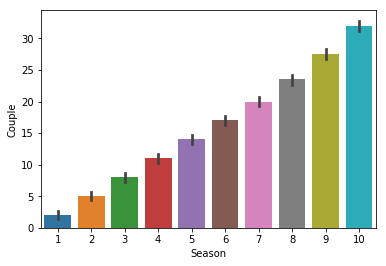

In [13]:
#let us see thenumber of participants in each session using a histograme
import matplotlib.pyplot as plt

ax = sns.barplot(x = 'Season', y = 'Couple', data = df)
plt.show()

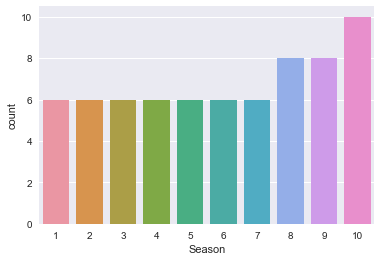

In [14]:
sns.set(style = 'darkgrid', palette = 'deep')
sns.countplot(x = 'Season', data = df)
plt.show()

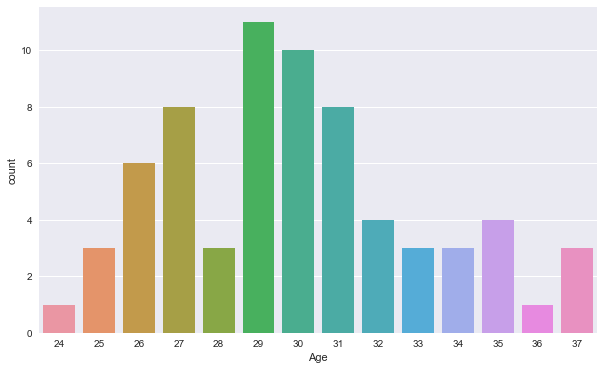

In [15]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Age', data = df, saturation = 0.75)

Text(0,0.5,'Season')

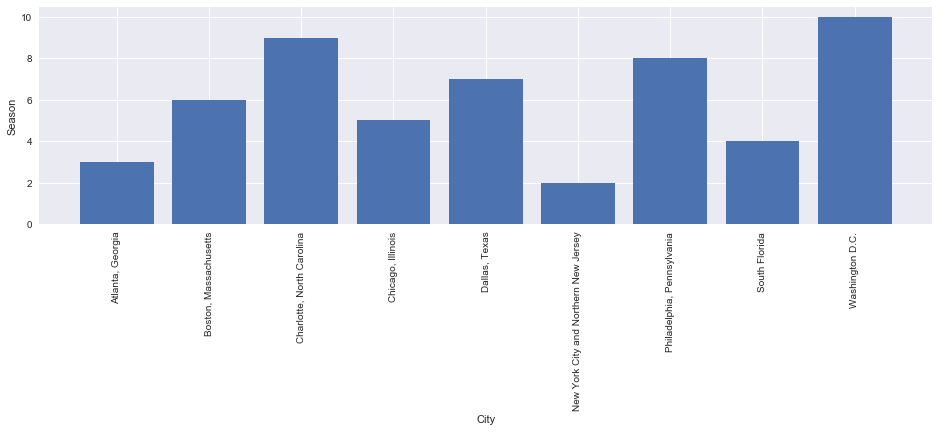

In [16]:
plt.figure(figsize = (16,4))
plt.bar(df['Location'],  df['Season'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Season')

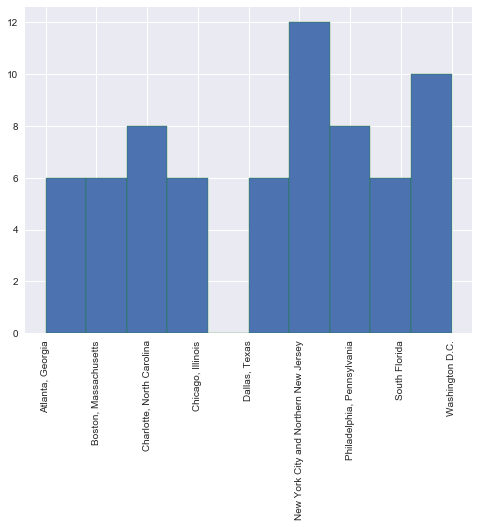

In [17]:
#lets print number of participants  from each city
plt.figure(figsize = (8,6))
plt.hist(df['Location'], edgecolor = 'green')
plt.xticks(rotation = 90)
plt.show()

In [18]:
dummy_decision = pd.get_dummies(df['Decision'])
dummy_decision

,No,Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [19]:
df2 = pd.concat([df, dummy_decision], axis = 1 )
df2.drop(["No", "Decision"], inplace = True, axis = 1)
df2.head(2)

,Couple,Season,Location,Name,Age,Gender,Occupation,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes,Yes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Married,1,1,1,1,0,0,0,0,1
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Married,1,1,1,1,0,0,0,0,1


1    48
0    20
Name: Yes, dtype: int64


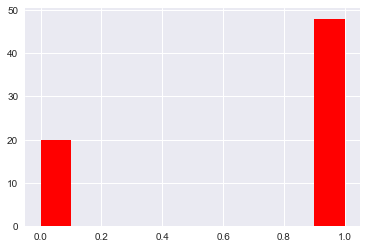

In [20]:
plt.hist(df2["Yes"], color = "red")
print(df2["Yes"].value_counts())
plt.show()
     

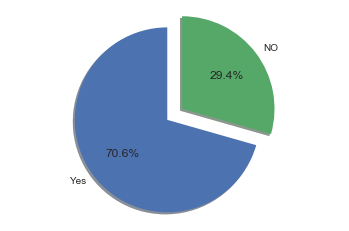

In [21]:
#A better representaion using piechart
labels = "Yes", "NO"
sizes = df2["Yes"].value_counts()
explode = (0,0.2)#breaking circle
fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, shadow = True,startangle = 90, autopct= "%1.1f%%" )
ax.axis('equal')
plt.show()

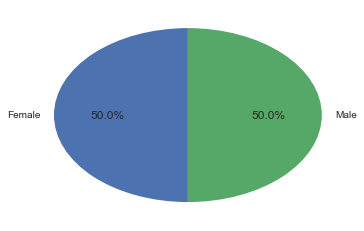

In [22]:
#showing a pie chart for % of Male and female.
labels = "Female", "Male"
sizes = df2['Gender'].value_counts()
fig ,ax= plt.subplots()
ax.pie(sizes, labels = labels, autopct = "%1.1f%%", startangle = 90)
plt.show()

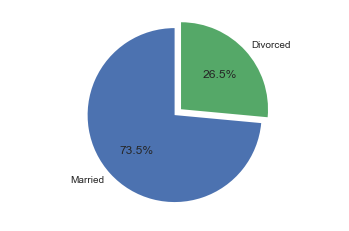

In [24]:
#how many people are divorce and married
labels = "Married", "Divorced"
sizes = df2['Status'].value_counts()
explode = (0,0.1)
fig,ax = plt.subplots()
ax.axis('equal')
ax.pie(sizes, labels = labels, explode=explode, autopct="%1.1f%%",startangle=90)
plt.show()